In [2]:
# Data manipulation
import pandas as pd
import numpy as np
import os

# tensoflow / keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense, InputLayer

# Sklearn
#import sklearn
from sklearn.metrics import classification_report

# Visualization
#import matplotlib
import matplotlib.pyplot as plt

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


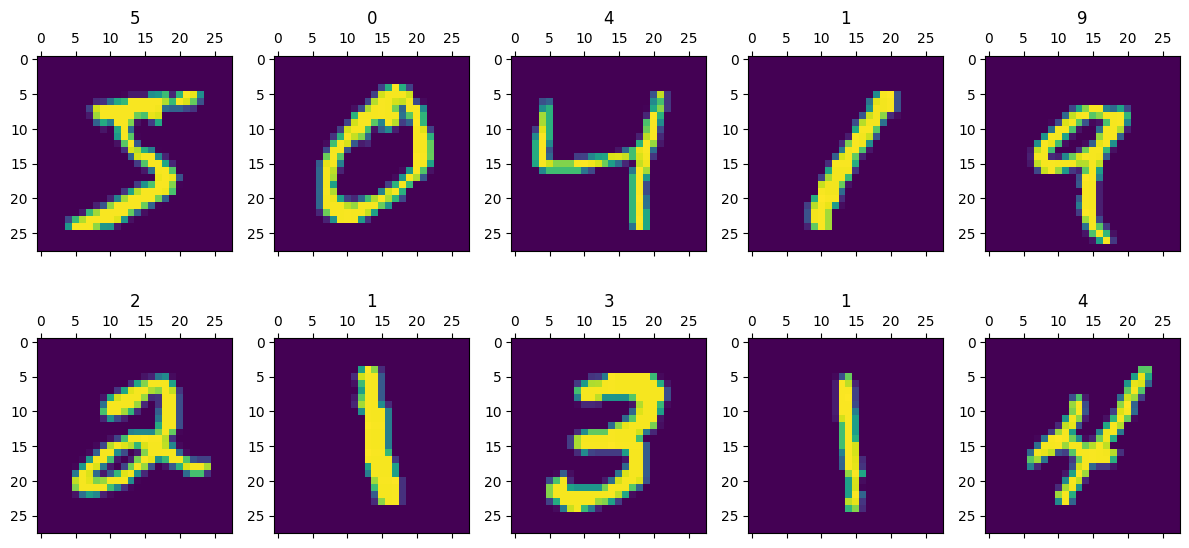

In [3]:
# Charger les données MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape) 
print("y_test shape:", y_test.shape)

# Afficher les 10 premières images
fig, axs = plt.subplots(2, 5, figsize=(12, 6),facecolor='w', tight_layout=True,sharey=False)
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(x_train[n])
        axs[i,j].set(title=y_train[n])
        n+=1
plt.show()

In [4]:
# Reshape les données
X_train = x_train.reshape(-1, 28*28).astype("float32")
X_test = x_test.reshape(-1, 28*28).astype("float32")

# Normalisation
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convertir en niveaux de gris
x_train = np.mean(x_train, axis=-1)
x_test = np.mean(x_test, axis=-1)

# print shape
print("new x_train shape:", X_train.shape)
print("new x_test shape:", X_test.shape)

new x_train shape: (60000, 784)
new x_test shape: (10000, 784)


In [5]:
# Créer le modèle

model = Sequential(name="model_alyra_1") # Création d'un modèle séquentiel
model.add(InputLayer(input_shape=(28*28,))) # Ajout de la couche d'entrée
model.add(Dense(128, activation='relu')) # Ajout de la couche cachée 
model.add(Dense(64, activation='relu')) # Ajout de la couche cachée
model.add(Dense(32, activation='relu')) # Ajout de la couche cachée
num_classes = len(np.unique(y_train)) 
model.add(Dense(num_classes, activation='softmax')) # output layer avec bonne fonction d'activation

# Compiler le modèle
model.compile(optimizer='adam' # choix de l'optimizer algo de backpropagation
              , loss='sparse_categorical_crossentropy' # fonction de coût
              , metrics=['accuracy'] # métrique d'évaluation
              )

# Entraîner le modèle
model.fit(X_train
          , y_train
          , epochs=10 # mettre le bon nombre d'epochs pour atteindre un bon entraînement
          , batch_size=10
          , validation_split=0.2
          )

# Utilisation du modèle
## sur les train data
pred_labels_train = np.argmax(model.predict(X_train), axis=1) 

## sur les test data
pred_labels_test = np.argmax(model.predict(X_test), axis=1)

# Evaluation des performances
print("")
print("model summary")
model.summary()
print("")

print("")
print("train data classification report")
print(classification_report(y_train, pred_labels_train))
print("")

print("")
print("test data classification report")
print(classification_report(y_test, pred_labels_test))
print("")


2025-04-02 22:38:55.817611: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
4800/4800 [==============================] - 44s 9ms/step - loss: 0.2492 - accuracy: 0.9234 - val_loss: 0.1681 - val_accuracy: 0.9495
Epoch 2/10
4800/4800 [==============================] - 74s 15ms/step - loss: 0.1130 - accuracy: 0.9651 - val_loss: 0.1160 - val_accuracy: 0.9652
Epoch 3/10
4800/4800 [==============================] - 59s 12ms/step - loss: 0.0835 - accuracy: 0.9738 - val_loss: 0.1034 - val_accuracy: 0.9704
Epoch 4/10
4800/4800 [==============================] - 54s 11ms/step - loss: 0.0667 - accuracy: 0.9801 - val_loss: 0.1115 - val_accuracy: 0.9693
Epoch 5/10
4800/4800 [==============================] - 31s 7ms/step - loss: 0.0534 - accuracy: 0.9827 - val_loss: 0.1274 - val_accuracy: 0.9667
Epoch 6/10
4800/4800 [==============================] - 29s 6ms/step - loss: 0.0472 - accuracy: 0.9855 - val_loss: 0.1127 - val_accuracy: 0.9715
Epoch 7/10
4800/4800 [==============================] - 30s 6ms/step - loss: 0.0404 - accuracy: 0.9871 - val_loss: 0.1111 - val

In [6]:
# Sauvegarder le modèle
model_folder = "../model"
model.save(os.path.join(model_folder,"model_alyra_0.1.0.h5"))
print(f"model saved as model_alyra_0.1.0.h5 in {model_folder} folder")

model saved as model_alyra_0.1.0.h5 in ../model folder
